<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-в-задаче-классификации-успеха-маркетинговой-кампании" data-toc-modified-id="Логистическая-регрессия-в-задаче-классификации-успеха-маркетинговой-кампании-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Логистическая регрессия в задаче классификации успеха маркетинговой кампании</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Датасет" data-toc-modified-id="Датасет-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Датасет</a></span></li></ul></li></ul></div>

# Логистическая регрессия в задаче классификации успеха маркетинговой кампании

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

## Логистическая регрессия

Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу. 

Метод основан на минимизации логистической функции потерь:

$$L(y_{true}, y_{predicted}) = \sum_{i=1}^n \ln (1 + e^{-y_{true} \cdot y_{predicted}}) \rightarrow \min_w,$$
где $y_{predicted}$ вычисляется по формуле $y_{predicted} = <w, x>$. Минимизация функции потерь происходит методом градиентного спуска.

In [3]:
from sklearn.linear_model import LogisticRegression

## Датасет

Возьмем датасет, содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Наша задача $-$ предсказать успешность кампании для каждого клиента. Признаками являются различные характеристики клиента и кампании.

Ссылка на датасет: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [4]:
# Считаем данные
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [27]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()
y = LabelBinarizer().fit_transform(y).ravel()

Классы очень несбалансированы:

In [28]:
y.mean()

0.11265417111780131

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является **one-hot encoding**. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$, и 0 $-$ иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [9]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

Разобьем выборку на трейн и тест 80/20:

In [10]:
### Type your code here

Обучим линейный SVM с балансировкой классов и линейным ядром:

In [11]:
from sklearn.svm import SVC

In [ ]:
### Type your code here

Выполним предсказание и посчитаем метрики на тесте:

In [ ]:
### Type your code here

Обучим логистическую регрессию и выполним предсказание (y_predicted). Из-за несбалансированности классов порог нужно выставлять в зависимости от целей кампании, т.е. нужно получать вероятность отнесения к классу, а не только предсказанное значение:

In [ ]:
### Type your code here

Построим график зависимости F-меры от порога положительного класса:

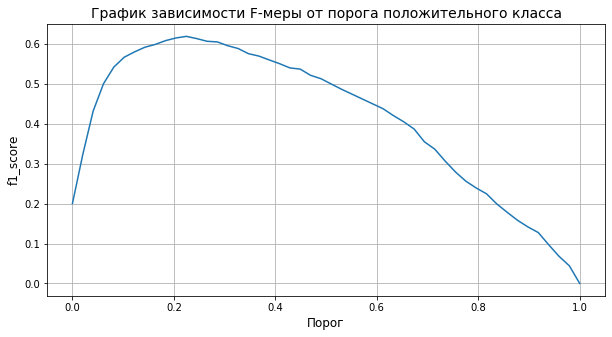

In [26]:
grid = np.linspace(0, 1, 50)
plt.figure(figsize=(10,5))
plt.title('График зависимости F-меры от порога положительного класса', fontsize=14)
plt.plot(grid, [f1_score(y_test, y_predicted > item) for item in grid])
plt.grid()
plt.xlabel('Порог', fontsize=12)
plt.ylabel('f1_score', fontsize=12);

Посчитаем метрики:

In [ ]:
### Type your code here